In [11]:
import pandas as pd
current_matches = pd.read_csv('parlay.csv')
# Convert odds to implied probability
def implied_probability(odds):
    return 1 / odds

current_matches['HomeProb'] = 1 / current_matches['HomeOdds']
current_matches['DrawProb'] = 1 / current_matches['DrawOdds']
current_matches['AwayProb'] = 1 / current_matches['AwayOdds']
current_matches['TotalProb'] = current_matches['HomeProb'] + current_matches['DrawProb'] + current_matches['AwayProb']
current_matches

,Home,Away,HomeOdds,DrawOdds,AwayOdds,HomeProb,DrawProb,AwayProb,TotalProb
0,Como,Juventus,3.80,3.4,2.00,0.263158,0.294118,0.500000,1.057276
1,Empoli,Milan,5.50,3.8,1.65,0.181818,0.263158,0.606061,1.051037
2,Brigthon,Chelsea,3.00,3.5,2.30,0.333333,0.285714,0.434783,1.053830
3,Aston Villa,Tottenham,1.75,4.0,4.20,0.571429,0.250000,0.238095,1.059524
4,Everton,Bournemoth,2.90,3.3,2.40,0.344828,0.303030,0.416667,1.064525
5,Real Madrid,Ath Madrid,1.85,3.6,4.20,0.540541,0.277778,0.238095,1.056414
6,Bilbao,Girona,1.65,4.0,5.00,0.606061,0.250000,0.200000,1.056061
7,Wolfburg,Bayern Leverkusen,4.50,3.6,1.80,0.222222,0.277778,0.555556,1.055556


In [14]:
# Estimated Actual Odds and Bookies Take (assuming all outcomes share equal cuts)
current_matches['Total Bookie Cut'] = current_matches['TotalProb'] - 1
current_matches['RealHomeProb'] = current_matches['HomeProb'] - current_matches['Total Bookie Cut']/3
current_matches['RealDrawProb'] = current_matches['DrawProb'] - current_matches['Total Bookie Cut']/3
current_matches['RealAwayProb'] = current_matches['AwayProb'] - current_matches['Total Bookie Cut']/3

current_matches['RealHomeOdds'] = 1 / current_matches['RealHomeProb']
current_matches['RealDrawOdds'] = 1 / current_matches['RealDrawProb']
current_matches['RealAwayOdds'] = 1 / current_matches['RealAwayProb']

current_matches

,Home,Away,HomeOdds,DrawOdds,AwayOdds,HomeProb,DrawProb,AwayProb,TotalProb,Total Bookie Cut,RealHomeProb,RealDrawProb,RealAwayProb,RealHomeOdds,RealDrawOdds,RealAwayOdds
0,Como,Juventus,3.80,3.4,2.00,0.263158,0.294118,0.500000,1.057276,0.057276,0.244066,0.275026,0.480908,4.097252,3.636023,2.079399
1,Empoli,Milan,5.50,3.8,1.65,0.181818,0.263158,0.606061,1.051037,0.051037,0.164806,0.246146,0.589048,6.067742,4.062635,1.697653
2,Brigthon,Chelsea,3.00,3.5,2.30,0.333333,0.285714,0.434783,1.053830,0.053830,0.315390,0.267771,0.416839,3.170678,3.734536,2.399007
3,Aston Villa,Tottenham,1.75,4.0,4.20,0.571429,0.250000,0.238095,1.059524,0.059524,0.551587,0.230159,0.218254,1.812950,4.344828,4.581818
4,Everton,Bournemoth,2.90,3.3,2.40,0.344828,0.303030,0.416667,1.064525,0.064525,0.323319,0.281522,0.395158,3.092917,3.552119,2.530630
5,Real Madrid,Ath Madrid,1.85,3.6,4.20,0.540541,0.277778,0.238095,1.056414,0.056414,0.521736,0.258973,0.219291,1.916678,3.861403,4.560157
6,Bilbao,Girona,1.65,4.0,5.00,0.606061,0.250000,0.200000,1.056061,0.056061,0.587374,0.231313,0.181313,1.702494,4.323144,5.515320
7,Wolfburg,Bayern Leverkusen,4.50,3.6,1.80,0.222222,0.277778,0.555556,1.055556,0.055556,0.203704,0.259259,0.537037,4.909091,3.857143,1.862069


<Axes: xlabel='Home'>

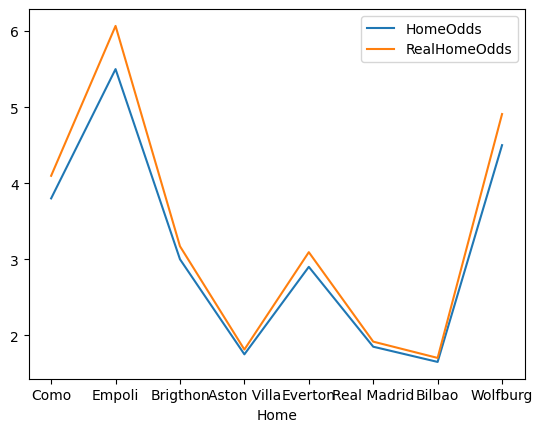

In [15]:
current_matches.plot(x='Home', y=['HomeOdds', 'RealHomeOdds'])

<Axes: xlabel='Away'>

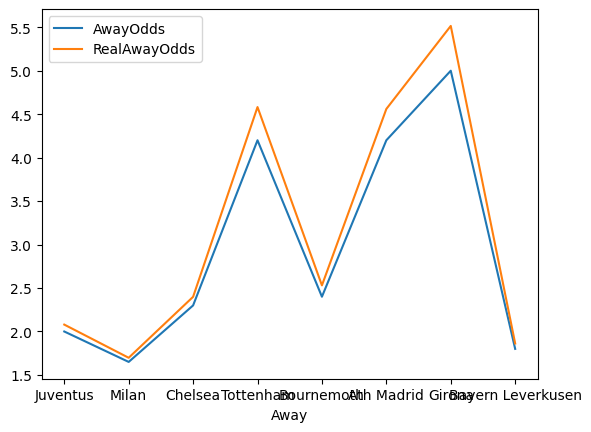

In [16]:
current_matches.plot(x='Away', y=['AwayOdds', 'RealAwayOdds'])

In [1]:
import numpy as np
initial_bet_amt = np.float64(30)
number_of_bets = 4
risk = 1.2
idosyncratic_risk = 0.05
bookie_cut = 0.178

approx_odds = [np.round(np.exp(risk-bet_number) + risk + 0.2 + np.random.normal(0, idosyncratic_risk), 1) for bet_number in range(number_of_bets)]
implied_probability = [1/odds - (1/odds)*bookie_cut for odds in approx_odds]

expected_returns = []
max_returns_per_step = []
bet_size = []
back_up_bet_size = []
for i in range(number_of_bets):
    if i==0:
        bet_size.append(initial_bet_amt)
        back_up_bet_size.append(np.float64(0.0))
    elif i==1:
        bet_size.append(max_returns_per_step[i-1] + bet_size[-1] - initial_bet_amt)
        back_up_bet_size.append(initial_bet_amt)
    else:
        back_up_bet_size.append(max(bet_size[i-1]*0.4, initial_bet_amt*1.5))
        bet_size.append(max_returns_per_step[i-1] + bet_size[i-1]  - back_up_bet_size[-1])
    max_returns_per_step.append(bet_size[-1] * approx_odds[i] - bet_size[-1])
    expected_returns.append(max_returns_per_step[-1] * implied_probability[i] - (bet_size[-1] * (1-implied_probability[i])) + back_up_bet_size[-1])

print("All win scenario")
for bet_size, fuel, max_returns_per_step, odds, expected_return in zip(bet_size, back_up_bet_size, max_returns_per_step, approx_odds, expected_returns):
    print(f'Bet Size: {bet_size:.2f}, Fuel: {fuel:.2f}, Bet Return: {max_returns_per_step:.2f} Total amt show: {max_returns_per_step + bet_size:.2f}, Odds: {odds:.2f}, Balance: {fuel + max_returns_per_step:.2f} Probability: {1/odds:.2f} \
Expected Return (no fuel): {expected_return - fuel:.2f} Expected Return (with fuel): {expected_return:.2f}')

All win scenario
Bet Size: 30.00, Fuel: 0.00, Bet Return: 111.00 Total amt show: 141.00, Odds: 4.70, Balance: 111.00 Probability: 0.21 Expected Return (no fuel): -5.34 Expected Return (with fuel): -5.34
Bet Size: 111.00, Fuel: 30.00, Bet Return: 177.60 Total amt show: 288.60, Odds: 2.60, Balance: 207.60 Probability: 0.38 Expected Return (no fuel): -19.76 Expected Return (with fuel): 10.24
Bet Size: 243.60, Fuel: 45.00, Bet Return: 194.88 Total amt show: 438.48, Odds: 1.80, Balance: 239.88 Probability: 0.56 Expected Return (no fuel): -43.36 Expected Return (with fuel): 1.64
Bet Size: 341.04, Fuel: 97.44, Bet Return: 204.62 Total amt show: 545.66, Odds: 1.60, Balance: 302.06 Probability: 0.62 Expected Return (no fuel): -60.71 Expected Return (with fuel): 36.73


In [325]:
output_table = np.zeros((2**(number_of_bets-1), number_of_bets))
fuel = np.zeros((2**(number_of_bets-1), number_of_bets))
for j in range(number_of_bets):
    for i in range(2**(number_of_bets-1)):
        if j == 0:
            if i == 0:
                output_table[i, j] = initial_bet_amt * approx_odds[j]
            else:
                continue
        else:
            if i % 2 == 0:
                fuel[i, j] = min(output_table[i//2, j-1]*0.4, initial_bet_amt*1.5) if j > 1 else initial_bet_amt
                bet_amt = output_table[i//2, j-1] - fuel[i, j]
                if bet_amt <= 0:
                    fuel[i, j] = 0.0
                    continue
            else:
                if fuel[i//2, j-1] == 0:
                    continue
                bet_amt = fuel[i//2, j-1] if fuel[i//2, j-1] < 1.5*initial_bet_amt else initial_bet_amt
                fuel[i, j] = fuel[i//2, j-1] - bet_amt
            odd = approx_odds[0] if bet_amt < 1.5*initial_bet_amt else approx_odds[1]
            output_table[i, j] =  bet_amt * odd + fuel[i, j]

In [329]:
import pandas as pd
A = pd.DataFrame(output_table, columns=[f'Bet {i+1}' for i in range(number_of_bets)])
display(A)

,Bet 1,Bet 2,Bet 3,Bet 4
0,141.0,318.6,756.36,1894.536
1,0.0,0.0,141.00,156.000
2,0.0,0.0,0.00,294.600
3,0.0,0.0,0.00,0.000
4,0.0,0.0,0.00,0.000
5,0.0,0.0,0.00,0.000
6,0.0,0.0,0.00,0.000
7,0.0,0.0,0.00,0.000


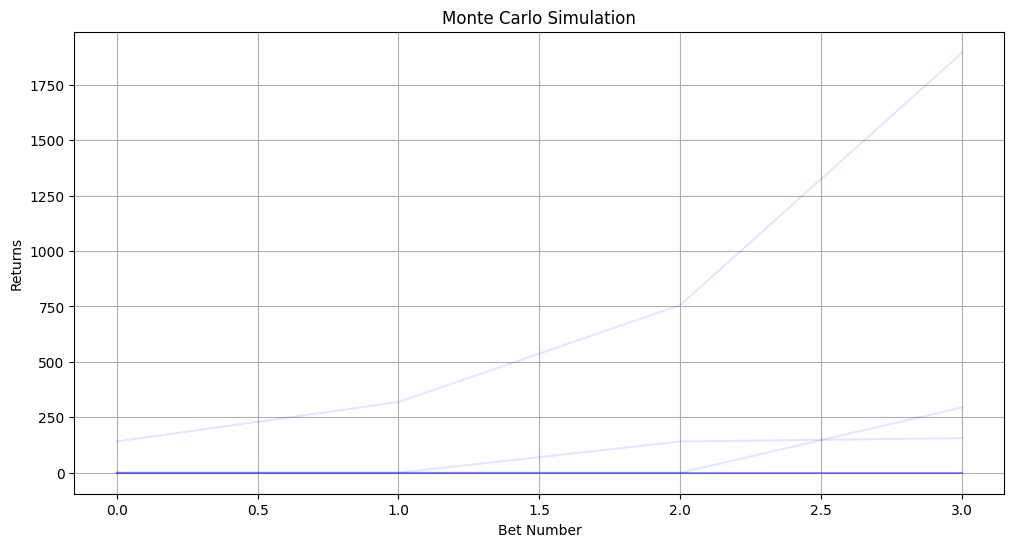

In [315]:
import matplotlib.pyplot as plt

# Plot each row of the output_table as a line in the graph
plt.figure(figsize=(12, 6))
for row in output_table:
    plt.plot(row, alpha=0.1, color='blue')  # Use alpha for transparency to visualize overlapping lines

plt.title('Monte Carlo Simulation')
plt.xlabel('Bet Number')
plt.ylabel('Returns')
plt.grid(True)
plt.show()